## 60191118 윤지훈

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('./data/iris_sepal.csv')

In [15]:
df

,Sepal.length,Sepal.width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Text(29.0, 0.5, 'y')

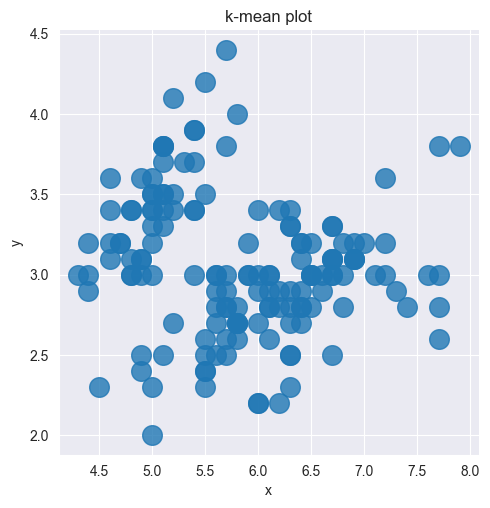

In [16]:
# 산점도 그리기
sns.lmplot(x='Sepal.length', y='Sepal.width', data=df, fit_reg=False, scatter_kws={"s":200})
# fir_reg=False : 회귀직선 없이 산점도만
# scatter_kws : size를 조절

plt.title('k-mean plot')
plt.xlabel('x')
plt.ylabel('y')

In [17]:
!pip install threadpoolctl==3.1.0


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


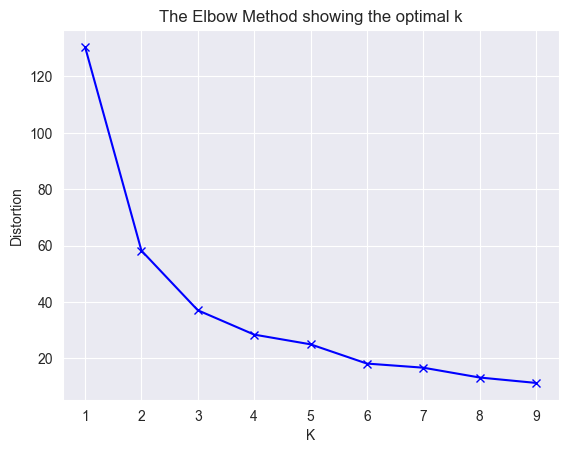

In [18]:
X = df.values # 인덱스를 제외한 값을 ndarry로 추출
inertia_arr = [] # SEE 값을 저장하기 위한 list
K = range(1,10)
for k in K:
    # 모델적합
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia = kmeanModel.inertia_
    inertia_arr.append(inertia)

# Plot the elbow
plt.plot(K, inertia_arr, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
# 최적 K 개수로 클러스터링 수행 -> 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [20]:
kmeans.labels_ # 클러스터 결과 확인

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [21]:
df['cluster_id'] = kmeans.labels_

In [22]:
df

,Sepal.length,Sepal.width,cluster_id
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,0
147,6.5,3.0,2
148,6.2,3.4,2


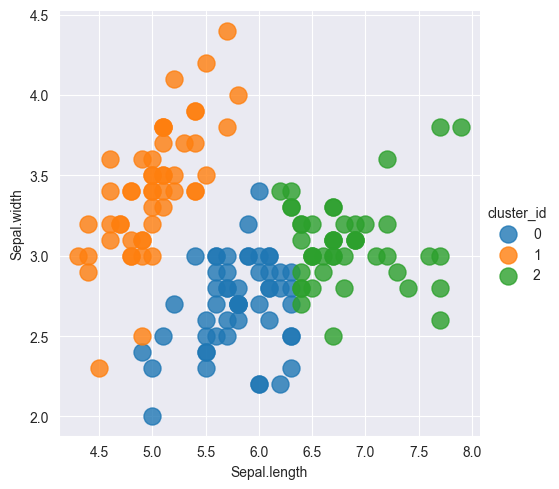

In [24]:
# 클러스터링 시각화
sns.lmplot(x='Sepal.length', y='Sepal.width', data=df, fit_reg=False, scatter_kws={"s":150}, hue='cluster_id')

## 소감
k-평균 군집화를 사용하여 데이터간 군집을 나누는 작업을 실행했다.
반복잡업을 통해 자동으로 군집을 분류해준다는게 신기했다.
군집을 나눌시 중요한 요소가 군집 개수인 k를 구하는 작업인것 같은데,
그래프를 그려 최적의 군집 수를 선택했다. 하지만 예제에서와 달리 그래프의 기울기 각이 정확히 어디서 변화가 심한지 구분하기 어려운 문제가 있었다.
그래프말고 수치로 비교할 수 있으면 더 좋을것 같다.